<a href="https://colab.research.google.com/github/alirexafxali/MNIST_class_AE/blob/main/MNIST_Classification_and_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
#tf.__version__

2- Datasets and preprocessing


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_tr,y_tr), (x_ts, y_ts) = fashion_mnist.load_data()
x_tr = x_tr /255.0
x_ts = x_ts /255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


3- Showing the images

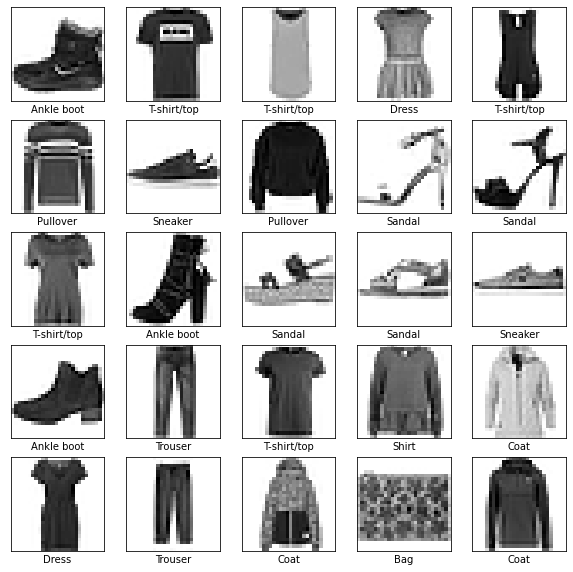

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_tr[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_tr[i]])
plt.show()

4- Model construction


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

5- Compilation

In [5]:
model.compile(optimizer= 'adam', loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

6- Model training 

In [6]:
history = model.fit(x_tr, y_tr, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5532 - accuracy: 0.8072
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3774 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3381 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3134 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2939 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2773 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2646 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2503 - accuracy: 0.9070
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2394 - accuracy: 0.9108
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.228

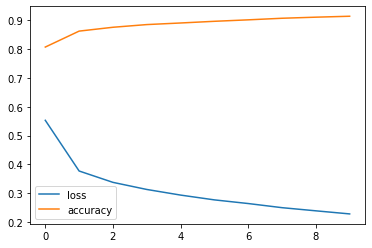

In [7]:
history_df = pd.DataFrame(history.history)
history_df.plot()

7- Predictions

In [8]:
predictions = model.predict(x_ts)

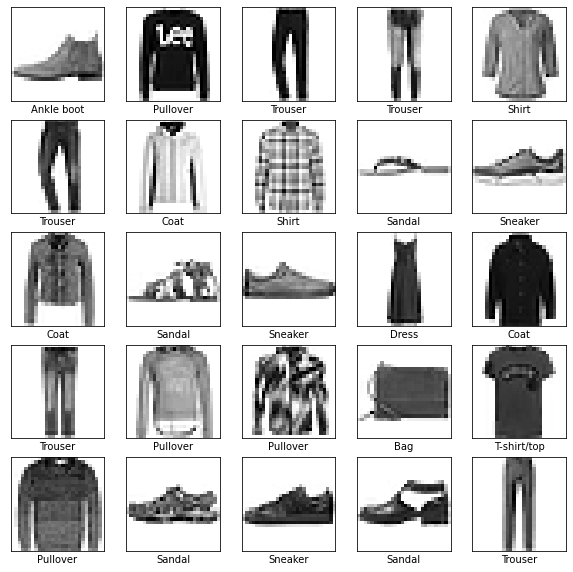

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_ts[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()



8- Model heatmap evaluation

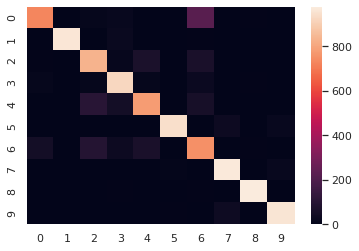

In [10]:
eval = np.zeros((10, 10))
for i in range(len(y_ts)):
  eval[y_ts[i], np.argmax(predictions[i])] += 1

sns.set_theme()
hm = sns.heatmap(eval)


9- Auto-Encoder

In [11]:

input_img = keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
#reshaping
x_tr1 = x_tr.reshape((len(x_tr), np.prod(x_tr.shape[1:])))
x_ts1 = x_ts.reshape((len(x_ts), np.prod(x_ts.shape[1:])))


10- Auto-Encoder Compilation

In [ ]:
#ae_model.compile(optimizer = 'adam', loss= tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_tr1, x_tr1,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_ts1, x_ts1))

Epoch 1/100
235/235 [==============================] - 5s 18ms/step - loss: 0.3786 - val_loss: 0.3189
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3101 - val_loss: 0.3080
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3021 - val_loss: 0.3013
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2975 - val_loss: 0.2977
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2945 - val_loss: 0.2956
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2924 - val_loss: 0.2933
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2901 - val_loss: 0.2914
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2884 - val_loss: 0.2908
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2868 - val_loss: 0.2883
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.285

In [ ]:
#ae_history = ae_model.fit(x_tr1, x_tr1, epochs=10)

In [ ]:
ae_predictions = autoencoder.predict(x_ts1)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(x_ts[i], cmap=plt.cm.binary)
    plt.imshow(ae_predictions[i].reshape(28, 28))
plt.show()
